Trần Minh Quân MSSV: 20521796

Trần Diểm Mỹ Ngọc MSSV:20521668

Phạm Huỳnh Thái Nguyên MSSV: 20521679

Thực hiện đánh giá các thuật toán đã học (SVM, DT, RF) trên dataset đã tìm được ở bước 02. Các nhóm thực hiện đánh giá càng nhiều chỉ số (f1, acc, recal...) thì sẽ có điểm cộng.


# ***Tên Đề tài: Phát hiện và Phân loại Tấn công DDoS trong Mạng SDN bằng Học Máy***

Mục tiêu: Đề tài này nhằm xây dựng một hệ thống phát hiện và phân loại tấn công DDoS trong mạng SDN bằng việc sử dụng mô hình học máy. SDN là một mô hình mạng mở và linh hoạt, và tấn công DDoS (Distributed Denial of Service) là một trong những mối đe dọa phổ biến trong mạng. Mục tiêu chính là xác định và phân loại lưu lượng mạng vào benign (lưu lượng hợp pháp) và malign (lưu lượng tấn công).

Dataset: Sử dụng dataset được tạo bằng Mininet Emulator và RYU simulator, bao gồm các thông tin như Timestamp, Datapath_id, flow_id, ip_src, ip_dst, tp_dst, ip_proto, icmp_code, icmp_type, và nhiều thuộc tính khác. Dataset có gắn nhãn benign là 0 và malign là 1.

Phát triển Hệ thống Phát hiện Tấn công DDoS: Dựa trên mô hình phân loại, phát triển hệ thống phát hiện tấn công DDoS thời gian thực cho mạng SDN. Hệ thống này có khả năng theo dõi lưu lượng mạng và cảnh báo khi phát hiện lưu lượng tấn công.

Thực hiện Đánh giá Các Thuật Toán Học Máy:
Sử dụng các thuật toán học máy như Support Vector Machine (SVM), Decision Tree (DT), và Random Forest (RF) để phân loại lưu lượng mạng thành benign và malign.
Đánh giá hiệu suất của mỗi thuật toán bằng cách sử dụng nhiều chỉ số như F1-score, accuracy (độ chính xác), recall (độ nhạy), và các chỉ số khác.
Đánh giá càng nhiều chỉ số càng tốt để hiểu rõ khả năng của thuật toán trong phát hiện tấn công DDoS.

https://www.kaggle.com/datasets/pmpcse/software-defined-network-specific-dataset?fbclid=IwAR2amRqFc2ACWFIbiVfORwS0vW8aVCuXsnz3PgLmb4zeZbuS-H4OWVB9YwE

# *Import Library*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle
import itertools

# *Load dataset*

In [ ]:
path = '/content/drive/MyDrive/bt lớn AI/FlowStatsfile.csv'
data = pd.read_csv(path)

In [ ]:
data.head(5)

,timestamp,datapath_id,flow_id,ip_src,tp_src,ip_dst,tp_dst,ip_proto,icmp_code,icmp_type,...,idle_timeout,hard_timeout,flags,packet_count,byte_count,packet_count_per_second,packet_count_per_nsecond,byte_count_per_second,byte_count_per_nsecond,label
0,1.679206e+09,4,10.0.0.11010.0.0.601,10.0.0.11,0,10.0.0.6,0,1,0,0,...,20,100,0,4,392,0.8,1.428571e-07,7.840000e+01,0.000014,0
1,1.679206e+09,4,10.0.0.6010.0.0.1101,10.0.0.6,0,10.0.0.11,0,1,0,8,...,20,100,0,4,392,0.8,1.250000e-07,7.840000e+01,0.000012,0
2,1.679206e+09,2,10.0.0.1505010.0.0.6585906,10.0.0.1,5050,10.0.0.6,58590,6,-1,-1,...,20,100,0,123106,8125380,24621.2,2.159754e-03,1.625076e+06,0.142551,0
3,1.679206e+09,2,10.0.0.11505010.0.0.6585901,10.0.0.11,5050,10.0.0.6,58590,1,0,0,...,20,100,0,4,392,0.8,1.739130e-07,7.840000e+01,0.000017,0
4,1.679206e+09,2,10.0.0.65859010.0.0.150506,10.0.0.6,58590,10.0.0.1,5050,6,0,0,...,20,100,0,557949,32038437970,111589.8,8.999177e-03,6.407688e+09,516.749000,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898443 entries, 0 to 898442
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   timestamp                 898443 non-null  float64
 1   datapath_id               898443 non-null  int64  
 2   flow_id                   898443 non-null  object 
 3   ip_src                    898443 non-null  object 
 4   tp_src                    898443 non-null  int64  
 5   ip_dst                    898443 non-null  object 
 6   tp_dst                    898443 non-null  int64  
 7   ip_proto                  898443 non-null  int64  
 8   icmp_code                 898443 non-null  int64  
 9   icmp_type                 898443 non-null  int64  
 10  flow_duration_sec         898443 non-null  int64  
 11  flow_duration_nsec        898443 non-null  int64  
 12  idle_timeout              898443 non-null  int64  
 13  hard_timeout              898443 non-null  i

# *Preprocessing*

> - Feature Selection
> - Missing value
> - Transformers for numeric features & categorical feature
> - Split data
> - Handle imbalance class

In [ ]:
# Drop non-numeric columns for simplicity
data = data.select_dtypes(include=['number'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898443 entries, 0 to 898442
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   timestamp                 898443 non-null  float64
 1   datapath_id               898443 non-null  int64  
 2   tp_src                    898443 non-null  int64  
 3   tp_dst                    898443 non-null  int64  
 4   ip_proto                  898443 non-null  int64  
 5   icmp_code                 898443 non-null  int64  
 6   icmp_type                 898443 non-null  int64  
 7   flow_duration_sec         898443 non-null  int64  
 8   flow_duration_nsec        898443 non-null  int64  
 9   idle_timeout              898443 non-null  int64  
 10  hard_timeout              898443 non-null  int64  
 11  flags                     898443 non-null  int64  
 12  packet_count              898443 non-null  int64  
 13  byte_count                898443 non-null  i

In [ ]:
# Missing value
print("Check Missing value: ", sum(data.isnull().sum(axis = 0)))

Check Missing value:  0


In [ ]:
# Split the data into features and target label
X = data.drop('label', axis=1)
y = data['label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
data.label.value_counts()

1    892181
0      6262
Name: label, dtype: int64

In [ ]:
y_train.value_counts()

1    713715
0      5039
Name: label, dtype: int64

=> `Mất cân bằng dữ liệu`

In [ ]:
# Handle imbalance class
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [ ]:
# Kiểm tra phân bố sau khi cân bằng
print("Phân bố lớp sau khi áp dụng SMOTE:")
print(pd.Series(y_train_balanced).value_counts())

Phân bố lớp sau khi áp dụng SMOTE:
1    713715
0    713715
Name: label, dtype: int64


# *Models Machine Learning*

## *SVM*

In [ ]:
# Cài đặt hyperparameter
C = 1.0
kernel = 'rbf'
gamma = 'auto'
random_state = 42

# Thêm regularization L2
tol = 1e-3

svm_model = SVC(C=C, kernel=kernel, gamma=gamma,
                 random_state=random_state,
                 tol=tol)

svm_model.fit(X_train_balanced, y_train_balanced)
y_pred_svm = svm_model.predict(X_test)

## *Decision Tree*

In [ ]:
# Cài đặt hyperparameter
random_state = 42
max_depth = 20
min_samples_leaf = 1

# Thêm regularization CCP
ccp_alpha = 0.0

dt_model = DecisionTreeClassifier(max_depth=max_depth,
                                   random_state=random_state,
                                   min_samples_leaf=min_samples_leaf,
                                   ccp_alpha=ccp_alpha)

dt_model.fit(X_train_balanced, y_train_balanced)
y_pred_dt = dt_model.predict(X_test)

## *Random Forest*

In [ ]:
# Cài đặt hyperparameter
random_state = 42
n_estimators = 500
max_depth = 10
min_samples_leaf = 1

rf_model = RandomForestClassifier(n_estimators=n_estimators,
                                max_depth=max_depth,
                                random_state=random_state,
                                min_samples_leaf=min_samples_leaf,
                                max_features='sqrt',
                                bootstrap=True,
                                oob_score=True) # Sử dụng out-of-bag score để đánh giá

rf_model.fit(X_train_balanced, y_train_balanced)
y_pred_rf = rf_model.predict(X_test)

# *Evaluation*

## *Function*

In [ ]:
# evalution. Reference: https://machinelearningcoban.com/2017/08/31/evaluation/
# Accuracy, Confusion matrix, ROC, Recall, F1-Score, Precision
# Sẽ chỉ lưu vào csv các giá trị Accuracy, Recall, F1-Score, Precision
# Làm thêm: Confusion matrix, ROC, cross-validation (5-fold)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_ROC(fpr, tpr):
  plt.figure()
  lw = 2
  plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example')
  plt.legend(loc="lower right")
  plt.show()

def show_evaluate(y_test, y_pred, t='model'):
  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)

  # Accuracy, Recall, F1-Score, Precision
  print(f"Accuracy: {accuracy}")
  print(f"Recall: {recall}")
  print(f"F1-Score: {f1}")
  print(f"Precision: {precision}")
  # Show all classification_report(y_test, y_pred)
  print(f'Evaluate Detail of {t}')
  print(classification_report(y_test, y_pred))

  # Confusion matrix
  cnf_matrix = confusion_matrix(y_test, y_pred)
  # Plot non-normalized confusion matrix
  class_names = [0, 1]
  plt.figure()
  plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

  # Plot normalized confusion matrix
  plt.figure()
  plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

  plt.show()
  return accuracy, recall, f1, precision

## *Show*

Accuracy: 1.0
Recall: 1.0
F1-Score: 1.0
Precision: 1.0
Evaluate Detail of model SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1223
           1       1.00      1.00      1.00    178466

    accuracy                           1.00    179689
   macro avg       1.00      1.00      1.00    179689
weighted avg       1.00      1.00      1.00    179689



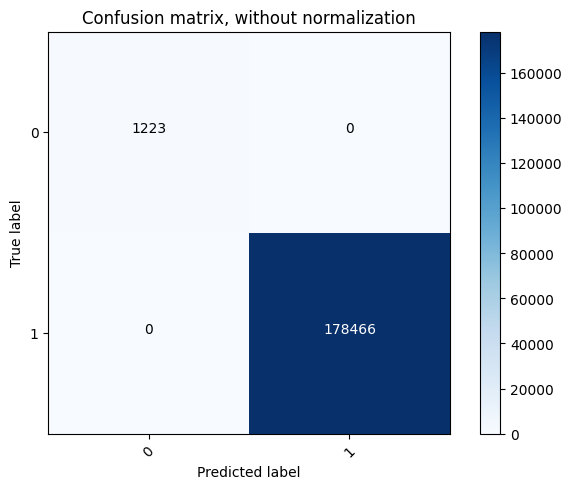

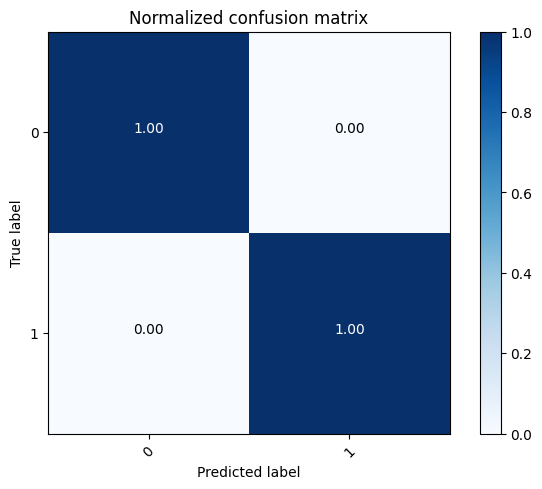

(1.0, 1.0, 1.0, 1.0)

In [ ]:
show_evaluate(y_test, y_pred_svm, 0, t='model SVM')

Accuracy: 1.0
Recall: 1.0
F1-Score: 1.0
Precision: 1.0
Evaluate Detail of model Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1223
           1       1.00      1.00      1.00    178466

    accuracy                           1.00    179689
   macro avg       1.00      1.00      1.00    179689
weighted avg       1.00      1.00      1.00    179689



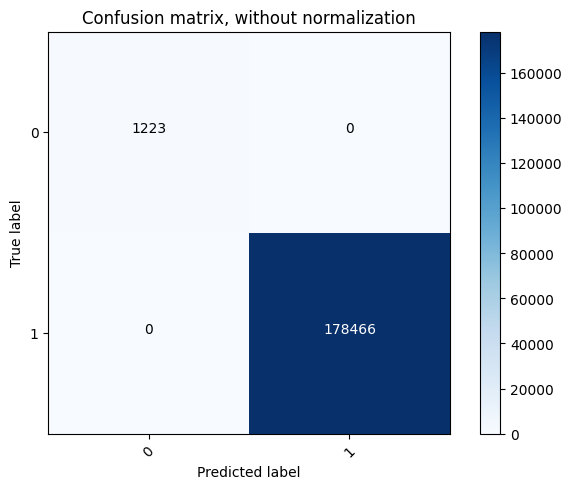

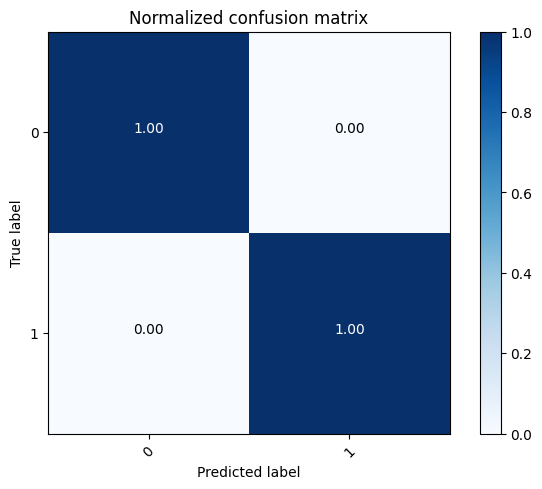

(1.0, 1.0, 1.0, 1.0)

In [ ]:
show_evaluate(y_test, y_pred_dt, t='model Decision Tree')

Accuracy: 1.0
Recall: 1.0
F1-Score: 1.0
Precision: 1.0
Evaluate Detail of model Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1223
           1       1.00      1.00      1.00    178466

    accuracy                           1.00    179689
   macro avg       1.00      1.00      1.00    179689
weighted avg       1.00      1.00      1.00    179689



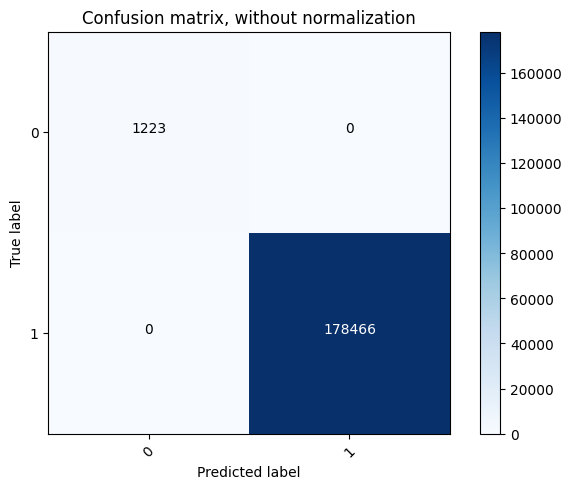

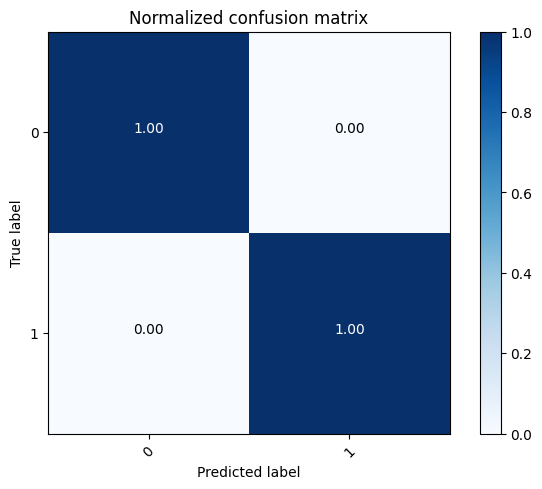

(1.0, 1.0, 1.0, 1.0)

In [ ]:
show_evaluate(y_test, y_pred_rf, t='model Random Forest')



```
Sử dụng cross validation cho model Decision Tree và Random Forest (Do 2 model này chạy nhanh)
```



In [ ]:
from sklearn.model_selection import cross_val_score

# cross-validation (5-fold)
scores_dt = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores for Decision Tree:", scores_dt)
print("Mean Accuracy:", scores_dt.mean())

Cross-Validation Scores for Decision Tree: [1.        1.        1.        1.        0.9984974]
Mean Accuracy: 0.9996994790971016


In [ ]:
# cross-validation (5-fold)
scores_rf = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores for Random Forest:", scores_rf)
print("Mean Accuracy:", scores_rf.mean())

Cross-Validation Scores for Random Forest: [1.         1.         1.         1.         0.99889252]
Mean Accuracy: 0.9997785049641601


#**Models Neural Network**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

## ANN

In [ ]:
# Xây dựng và huấn luyện mô hình với regularization
ann = Sequential([
    Dense(64, activation='relu', kernel_regularizer='l2', input_shape=(X_train_balanced.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer='l2'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

ann.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Sử dụng early stopping và model checkpoint
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5),
    ModelCheckpoint('best_model.h5', save_best_only=True)
]

ann.fit(X_train_balanced, y_train_balanced, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/50
44608/44608 [==============================] - 147s 3ms/step - loss: 0.0332 - accuracy: 0.9976 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 2/50
   52/44608 [..............................] - ETA: 2:13 - loss: 0.0105 - accuracy: 0.9988

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


44608/44608 [==============================] - 151s 3ms/step - loss: 0.0076 - accuracy: 0.9997 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 3/50
44608/44608 [==============================] - 143s 3ms/step - loss: 0.0061 - accuracy: 0.9998 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 4/50
44608/44608 [==============================] - 144s 3ms/step - loss: 0.0053 - accuracy: 0.9998 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 5/50
44608/44608 [==============================] - 145s 3ms/step - loss: 0.0054 - accuracy: 0.9998 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 6/50
44608/44608 [==============================] - 143s 3ms/step - loss: 0.0049 - accuracy: 0.9998 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 7/50
44608/44608 [==============================] - 140s 3ms/step - loss: 0.0047 - accuracy: 0.9998 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 8/50
44608/44608 [==============================] - 146s 3ms/step - loss: 0.0049 - accuracy: 0.9998 - val_loss: 0.003

## CNN

In [ ]:
# Xây dựng mô hình CNN với regularization
cnn = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', kernel_regularizer='l2', input_shape=(X_train_balanced.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer='l2'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

cnn.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Sử dụng early stopping và model checkpoint
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5),
    ModelCheckpoint('best_cnn_model.h5', save_best_only=True)
]

cnn.fit(X_train_balanced, y_train_balanced, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/10
44608/44608 [==============================] - 154s 3ms/step - loss: 0.0232 - accuracy: 0.9985 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 2/10
   50/44608 [..............................] - ETA: 2:17 - loss: 0.0111 - accuracy: 0.9994

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


44608/44608 [==============================] - 150s 3ms/step - loss: 0.0090 - accuracy: 0.9994 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 3/10
44608/44608 [==============================] - 150s 3ms/step - loss: 0.0073 - accuracy: 0.9996 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 4/10
44608/44608 [==============================] - 149s 3ms/step - loss: 0.0065 - accuracy: 0.9996 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 5/10
44608/44608 [==============================] - 149s 3ms/step - loss: 0.0061 - accuracy: 0.9997 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 6/10
44608/44608 [==============================] - 155s 3ms/step - loss: 0.0056 - accuracy: 0.9997 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 7/10
44608/44608 [==============================] - 155s 3ms/step - loss: 0.0055 - accuracy: 0.9997 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 8/10
44608/44608 [==============================] - 150s 3ms/step - loss: 0.0054 - accuracy: 0.9997 - val_loss: 0.004

# **Evaluation for Models Neural Network**

## Show

In [ ]:
y_test_nn = y_test.to_numpy()

5616/5616 [==============================] - 8s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Unde

Accuracy: 0.006806204052557475
Recall: 0.0
F1-Score: 0.0
Precision: 0.0
Evaluate Detail of model ANN
              precision    recall  f1-score   support

           0       0.01      1.00      0.01      1223
           1       0.00      0.00      0.00    178466

    accuracy                           0.01    179689
   macro avg       0.00      0.50      0.01    179689
weighted avg       0.00      0.01      0.00    179689



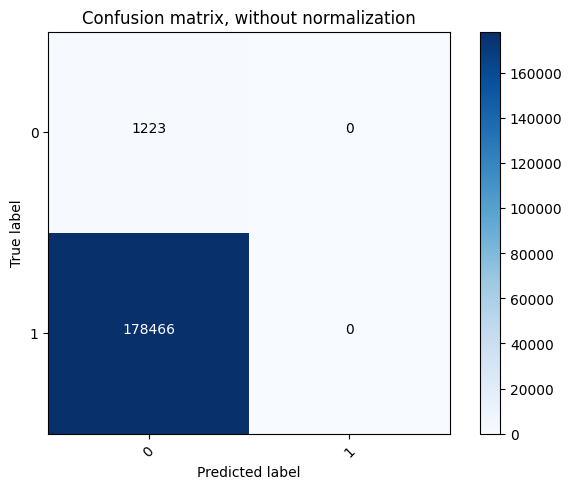

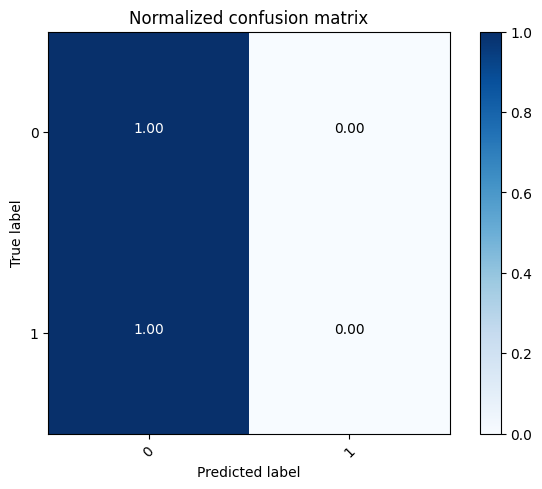

(0.006806204052557475, 0.0, 0.0, 0.0)

In [ ]:
y_pred_ann = ann.predict(X_test)
y_pred_ann = y_pred_ann.argmax(axis=1) # Convert probabilities to binary predictions

show_evaluate(y_test_nn, y_pred_ann, t='model ANN')

5616/5616 [==============================] - 8s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.006806204052557475
Recall: 0.0
F1-Score: 0.0
Precision: 0.0
Evaluate Detail of model CNN


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.01      1.00      0.01      1223
           1       0.00      0.00      0.00    178466

    accuracy                           0.01    179689
   macro avg       0.00      0.50      0.01    179689
weighted avg       0.00      0.01      0.00    179689



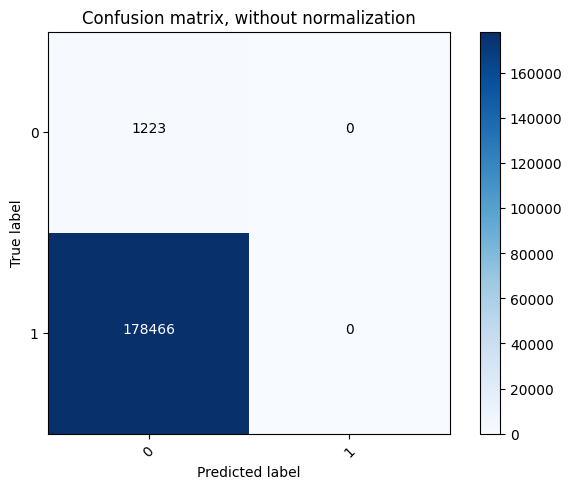

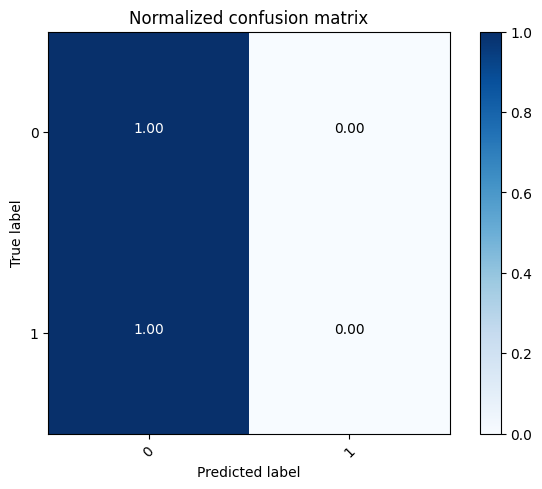

(0.006806204052557475, 0.0, 0.0, 0.0)

In [ ]:
y_pred_cnn = cnn.predict(X_test)
y_pred_cnn = y_pred_cnn.argmax(axis=1) # Convert probabilities to binary predictions

show_evaluate(y_test_nn, y_pred_cnn, t='model CNN')

# ***Save***

In [ ]:
models = ['Decision Tree', 'Random Forest', 'CNN', 'ANN']
y_pred_list = [y_pred_dt, y_pred_rf, y_pred_cnn, y_pred_ann]

evaluation_results = []

for model, y_pred in zip(models, y_pred_list):
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    evaluation_results.append({
        'Model': model,
        'Accuracy': accuracy,
        'Recall': recall,
        'F1-Score': f1,
        'Precision': precision
    })

evaluation_df = pd.DataFrame(evaluation_results)

evaluation_df.to_csv('Nhap_evaluation_results.csv', index=False)

5616/5616 [==============================] - 12s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Test Loss: 0.0039
Test Accuracy: 100.00%
5616/5616 [==============================] - 8s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1223
           1       1.00      1.00      1.00    178466

    accuracy                           1.00    179689
   macro avg       1.00      1.00      1.00    179689
weighted avg       1.00      1.00      1.00    179689



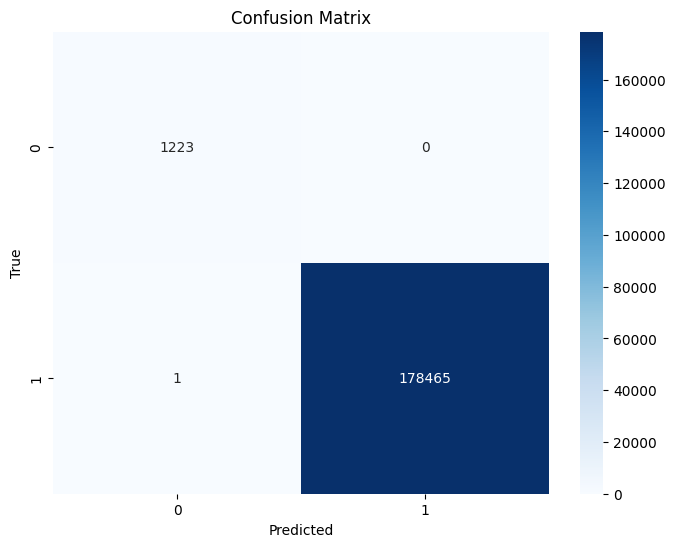

In [126]:
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Tải mô hình tốt nhất
cnn_best = load_model('best_cnn_model.h5')

# Đánh giá mô hình trên tập test
test_loss, test_accuracy = cnn_best.evaluate(X_test, y_test)
print("Test Loss: {:.4f}".format(test_loss))
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# Dự đoán trên tập test
y_pred = cnn_best.predict(X_test)
y_pred = (y_pred > 0.5)

# In báo cáo phân loại
print(classification_report(y_test, y_pred))

import seaborn as sns

# Vẽ ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



5616/5616 [==============================] - 11s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Test Loss: 0.0033
Test Accuracy: 100.00%
5616/5616 [==============================] - 8s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1223
           1       1.00      1.00      1.00    178466

    accuracy                           1.00    179689
   macro avg       1.00      1.00      1.00    179689
weighted avg       1.00      1.00      1.00    179689



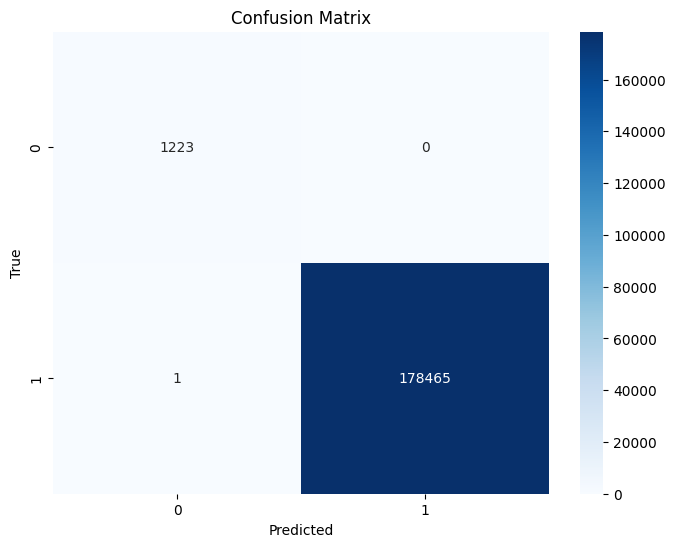

NameError: ignored

In [127]:
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Tải mô hình ANN tốt nhất
ann_best = load_model('best_model.h5')

# Đánh giá mô hình trên tập test
test_loss, test_accuracy = ann_best.evaluate(X_test, y_test)
print("Test Loss: {:.4f}".format(test_loss))
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# Dự đoán trên tập test
y_pred = ann_best.predict(X_test)
y_pred = (y_pred > 0.5)

# In báo cáo phân loại
print(classification_report(y_test, y_pred))

# Vẽ ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Vẽ đồ thị lịch sử huấn luyện
history = ann.history

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()
